# Blackjack simulation

Author: Arun Manohar

Email: arunmano121@outlook.com

License: BSD-3-Clause

Goal is to simulate a popular casino game **blackjack**. The game involves *n* players and *1* dealer with *m* decks of cards. The cards *2-10* have their usual value, while *A* can have either 1 or 11, *J*, *Q*, and *K* have a value of 10. 

The game starts with a shuffled deck, the dealer gets the first card and reveals it, following which 1 card is distributed to every player. Now, the dealer gets the second card that is masked, and the second cards are distributed to the other players. 

The scores are checked across the players, if a player gets 21 in total, he/she has hit the blackjack, they get 1.5 times the bet amount from the dealer and they are out of the game. If the players' score has exceeded 21, they go *bust* and the dealer collects their bet. 

The dealer starts with the remaining players, and they decide to *hit* (additional card is added), or *pass* (no card added). This depends on the risk appetite of the player, and the first card of the dealer. If the players' score exceeds 21, the dealer collects the bet and moves to the next player. This continues until all players have been checked. 

Now, the dealer reveals their second card. If they hit 21, the dealer has a blackjack, and collects all the bets of the remaining players. Otherwise, they continue drawing cards until they hit 17 at least. If their score is above 21, the dealer lost and matches the bets of the remaining players. If the score is between 17-21, at this stage, the dealer total is compared with the remaining players, if the dealer score is above the players, the dealer collects the bets from the players. If the dealer score is below the players, the dealer matches those players and give them the bet equivalent. If the score of the dealer and player is the same, no action is taken. 

This continues for a set number of rounds.

## Assumptions:
- In the simulation, the bets of each players is assumed to be the same at $10 per round.
- The players are all assumed to continue playing until the end of rounds, even if their balance is negative.

## Todo:
- Better risk functions


In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def shuffle_deck(m):
    '''
    shuffle and return deck comprising on m sets of 52 cards

    Parameters:
        m (int): number of decks

    Returns:
        deck (list): shuffled deck
    '''
    
    # number of decks is defined by m
    # define cards in deck for 4 suites
    deck = 4 * ['2','3','4','5','6','7','8','9','10','J','Q','K','A']
    deck *= m # m decks of cards

    # set numpy random seed for reproducibility
    # np.random.seed(13579)
    # shuffle the deck
    np.random.shuffle(deck)

    return deck

def A_adjustment(cards, score):
    '''
    if 'A' is present in cards, module to update cards and scores
    
    Parameters:
        cards (list): list of cards 
        score (int): score that needs to be adjusted if A is present in cards

    Returns:
        cards (list): updated list of cards
        score (int): updated score
    '''

    score -= 10 # remove 10 from score
    # swap first A with 1 and replace entry with A(1)
    for idx in range(len(cards)):
        if cards[idx] == 'A':
            cards[idx] = 'A(1)'
            break

    return cards, score

def blackjack(rounds, m, n, risk, verbose):
    '''
    A program to simulate the progression in a game of blackjack player by n players and dealer with m 
    decks of cards across a set number of rounds. 
    
    Parameters:
        rounds (int): number of rounds to play
        m (int): number of decks of cards
        n (int): number of players excluding dealer
        risk (string): regular, risky, conservative - risk appetite of player
        verbose (str): flag to print results at every iteration, or at end. 
                    Possible values - high, low, nil

    Returns:
        pot (list, int): list containing pot of individual players and dealer at each round
    '''

    # define a dictionary to hold values of different cards
    values = {'2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, 
              'J':10, 'Q':10, 'K':10, 'A':11}

    # hold each round pot in a seperate dictionary
    pot_h = {}
    pot_h['dealer'] = [100]
    for i in range(1, n+1): # across number of players after the dealer
        pot_h['player' + str(i)] = [100]

    # initalize deck of cards
    deck = shuffle_deck(m)

    if verbose != 'nil':
        print('-'*40)
        print('Blackjack')
        print('Number of players: %d Number of decks: %d' % (n, m))
        print('Initial pot: Dealer: $%d Players: $%d' % (pot_h['dealer'][0], pot_h['player1'][0]))
        print('-'*40)
        
    # iterate through rounds
    for round in range(1, rounds+1):
          
        # ensure there is atleast 30 cards in deck, if not shuffle the decks
        if len(deck) <= 30:
            deck = shuffle_deck(m)
            
        # player list to keep track of who is still in the game or gone bust
        players = [i for i in range(1, n+1)]

        # initialize empty dictionary to hold all cards and scores, pot, status
        cards = {}
        scores = {}
        status = {}
        pot = {}
        # assume all players start with $100, and dealer starts with $100
        # assume for simplicity each round bet is uniform at $10
        # set them to 0 values and empty list
        cards['dealer'] = []
        scores['dealer'] = 0
        pot['dealer'] = pot_h['dealer'][-1]
    
        for i in range(1, n+1): # across number of players after the dealer
            pot['player' + str(i)] = pot_h['player' + str(i)][-1]
            status['player' + str(i)] = 'player' + str(i)
            cards['player' + str(i)] = []
            scores['player' + str(i)] = 0
    
        # distribute first cards across dealer and players
        card = deck.pop()
        cards['dealer'].append(card)
        scores['dealer'] += values[card]
        
        # distribute first cards for players
        for i in players: # across number of players after the dealer
            card = deck.pop()
            cards['player' + str(i)].append(card)
            scores['player' + str(i)] += values[card]
        
        # distribute second cards across dealer and players
        card = deck.pop()
        cards['dealer'].append(card)
        scores['dealer'] += values[card]
        
        # distribute second cards for players
        for i in players: # across number of players after the dealer
            card = deck.pop()
            cards['player' + str(i)].append(card)
            scores['player' + str(i)] += values[card]
    
        # print dealer card, and all of player cards
        # print('First card of dealer - %s' % (cards['dealer'][0]))
        # print('Initial cards of players')
        # for i in players: # iterate through players
        #    print('player' + str(i) + ' cards, score, pot')
        #    print(cards['player' + str(i)], scores['player' + str(i)], pot['player' + str(i)])
            
        # check player scores, if anyone scored above 21 they go bust and lose the money to dealer
        # if they hit blackjack score - '21', the dealer gives them 1.5 times the bet, and they are out of the game
        # remove list
        rem_players = []
        for i in players: # across number of players after the dealer
            if scores['player' + str(i)] > 21: # check if there is an 'A' that can be converted to 1 instead of 11
                if 'A' in cards['player' + str(i)]: # yes, A is present in deck
                    cards['player' + str(i)], scores['player' + str(i)] = \
                        A_adjustment(cards['player' + str(i)], scores['player' + str(i)])     
                else: # player gone bust
                    # print('\nplayer%s has gone bust!' % (str(i)))
                    pot['player' + str(i)] -= 10 # player loses money
                    pot['dealer'] += 10 # dealer gains money
                    status['player' + str(i)] = 'bust'
                    # remove player from players list
                    rem_players.append(i)
            elif scores['player' + str(i)] == 21: # blackjack - player get 1.5 times payout
                # print('\nplayer%s has blackjack! yay!' % (str(i)))
                pot['player' + str(i)] += 1.5 * 10 # player get 1.5 times payout
                pot['dealer'] -= 1.5 * 10 # dealer loses 1.5 times player
                status['player' + str(i)] = 'blackjack'
                # remove player from players list
                rem_players.append(i)
        
        # updated players list
        for kk in rem_players:
            players.remove(kk)
        
        # each player decides continue play or not
        # print('Additional player cards (hit or pass)')
        for i in players: # across number of players after the dealer
            while scores['player' + str(i)] <= 21: # player continues play if they havent hit blackjack or bust
                # set seed for reproducibility
                # np.random.seed(13579)
                
                # setting the risk appetite 
                score_lim = 21
                if risk == 'regular':
                    score_lim = 21
                elif risk == 'risky':
                    score_lim = 25
                elif risk == 'conservative':
                    score_lim = 17
                    
                if scores['player' + str(i)] < score_lim * (1 - np.random.rand()):
                    # add a card
                    card = deck.pop()
                    cards['player' + str(i)].append(card)
                    scores['player' + str(i)] += values[card]
                else: # pass - no card added
                    break
                '''
              # setting the risk appetite 
                score_cutoff = 21
                
                if risk == 'regular':
                    score_cutoff = 14
                elif risk == 'risky':
                    score_cutoff = 17
                elif risk == 'conservative':
                    score_cutoff = 11
                    
                if scores['player' + str(i)] < score_cutoff:
                    # add a card
                    card = deck.pop()
                    cards['player' + str(i)].append(card)
                    scores['player' + str(i)] += values[card]
                else: # pass - no card added
                    break
                '''
        
        rem_players = []
        # check player scores, if anyone scored above 21 they go bust and lose the money to dealer
        for i in players: # across number of players after the dealer
            if scores['player' + str(i)] > 21: # check if there is 'A' in cards
                if 'A' in cards['player' + str(i)]: # yes, A is present in deck
                    cards['player' + str(i)], scores['player' + str(i)] = \
                        A_adjustment(cards['player' + str(i)], scores['player' + str(i)])     
                else: # player gone bust
                    # print('\nplayer%s has gone bust!' % (str(i)))
                    pot['player' + str(i)] -= 10 # player loses money
                    pot['dealer'] += 10 # dealer gains money
                    status['player' + str(i)] = 'bust'
                    rem_players.append(i)
        
        # updated players list
        for kk in rem_players:
            players.remove(kk)
        
        # now dealer reveals his second card and total score
        # print('\nDealer reveals cards - %s' % (cards['dealer']))
        # print('Scores of dealer - %s' % (scores['dealer']))
        
        # if scores['dealer'] < 17:
            # now dealer continues to draw cards until they hit 17
            # print('\nDealer continues to draw until they hit 17')
            
        while scores['dealer'] < 17:
            # add a card
            card = deck.pop()
            cards['dealer'].append(card)
            scores['dealer'] += values[card]
            # check if 'A' is in cards list, accordingly adjust score
            if 'A' in cards['dealer'] and scores['dealer'] > 21:
                cards['dealer'], scores['dealer'] = A_adjustment(cards['dealer'], scores['dealer'])                       
                    
        # compare dealer scores against the remaining players
        # first check if dealer went bust
        if scores['dealer'] > 21: # went bust - pass remaining players 2 times bets
            # print('Dealer went bust!')
            for i in players:
                pot['player' + str(i)] += 10 # player gets twice bet amount
                pot['dealer'] -= 10 # dealer loses twice players bet
                # status['dealer'] = 'bust'
                # set status for remaining players
                for i in players:
                    status['player'+str(i)] = 'won'
        else: # compare scores and accordingly payout
            for i in players:
                if scores['player' + str(i)] > scores['dealer']: # player is safe and makes money
                    pot['player' + str(i)] += 10 # player gets twice bet amount
                    pot['dealer'] -= 10 # dealer loses twice players bet
                    status['player' + str(i)] = 'won'
                elif scores['player' + str(i)] < scores['dealer']: # player loses to dealer
                    pot['player' + str(i)] -= 10 # player loses bet amount
                    pot['dealer'] += 10 # dealer gains players bet
                    status['player' + str(i)] = 'lost'
                else: # neither loss nor profit
                    status['player' + str(i)] = 'status-quo'
                    pass # do nothing

        # end of round
        # update pot_h at end of each round
        pot_h['dealer'].append(pot['dealer'])
        for i in range(1, n+1): # across number of players after the dealer
            pot_h['player' + str(i)].append(pot['player' + str(i)])
                   
        if verbose == 'high': # print at every iteration
            print('-'*40)
            print('Round %d - Cards, Scores, Pot, Status' % round)
            print('-'*40)
      
            # print all players cards, scores and pot
            for i in range(1, (n+1)):
                print('player' + str(i) + ': ' + '%s --> %s  $%d  %s' 
                    % (cards['player' + str(i)], scores['player' + str(i)], 
                       pot['player' + str(i)], status['player' + str(i)]))
            print('dealer : ' + '%s --> %s  $%d' 
                % (cards['dealer'], scores['dealer'], pot['dealer']))
    
    if verbose != 'nil':    
        print('-'*40)
        print('End of round %d - Final pot' % round)
        print('-'*40)
              
        # print all players pots
        for i in range(1, (n+1)):
            print('player' + str(i) + ': $%d' % (pot['player' + str(i)]))
        print('dealer : $%d' % (pot['dealer']))
            
    return pot_h


In [3]:
# players playing against casino over long runs
rounds = 100 # number of rounds
m = 4 # decks of cards
n = 7 # number of players
risk = 'conservative' # options are 'regular', 'risky' and 'conservative'
verbose = 'high' # options are 'high', 'low', 'nil'
pot_h = blackjack(rounds, m, n, risk, verbose)

----------------------------------------
Blackjack
Number of players: 7 Number of decks: 4
Initial pot: Dealer: $100 Players: $100
----------------------------------------
----------------------------------------
Round 1 - Cards, Scores, Pot, Status
----------------------------------------
player1: ['7', '7'] --> 14  $90  lost
player2: ['Q', '9'] --> 19  $100  status-quo
player3: ['J', 'Q'] --> 20  $110  won
player4: ['7', 'A'] --> 18  $90  lost
player5: ['4', 'K', 'Q'] --> 24  $90  bust
player6: ['4', 'K'] --> 14  $90  lost
player7: ['J', '7'] --> 17  $90  lost
dealer : ['2', '4', '8', '5'] --> 19  $140
----------------------------------------
Round 2 - Cards, Scores, Pot, Status
----------------------------------------
player1: ['9', 'A'] --> 20  $100  won
player2: ['8', '8'] --> 16  $90  lost
player3: ['J', 'J'] --> 20  $120  won
player4: ['10', '8'] --> 18  $80  lost
player5: ['8', '4', 'J'] --> 22  $80  bust
player6: ['10', 'Q'] --> 20  $100  won
player7: ['9', '3'] --> 12  $80  l

In [4]:
# max returns of each player
for i in range(1, n+1): # iterate through players
    index = np.argmax(pot_h['player' + str(i)])
    print('player%d - Round: %d, Returns: %d' % 
          (i, index, pot_h['player' + str(i)][index]))
index = np.argmax(pot_h['dealer'])
print('dealer - Round: %d, Returns: %d' % 
          (index, pot_h['dealer'][index]))

player1 - Round: 48, Returns: 155
player2 - Round: 13, Returns: 135
player3 - Round: 46, Returns: 170
player4 - Round: 13, Returns: 160
player5 - Round: 49, Returns: 140
player6 - Round: 13, Returns: 130
player7 - Round: 0, Returns: 100
dealer - Round: 99, Returns: 660


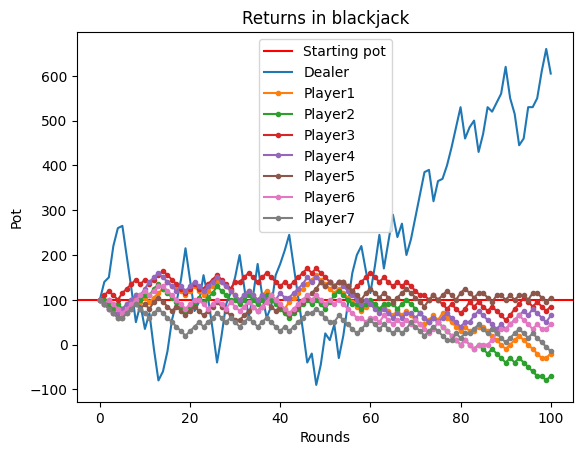

In [5]:
# plot dealer pot and history of players
plt.axhline(100, color='r', label='Starting pot')
plt.plot(range(rounds+1), pot_h['dealer'], label='Dealer')
for i in range(1, n+1): # iterate through players
    plt.plot(range(rounds+1), pot_h['player' + str(i)], marker = '.', label='Player' + str(i))
plt.xlabel('Rounds')
plt.ylabel('Pot')
plt.legend()
plt.title('Returns in blackjack')
plt.show()


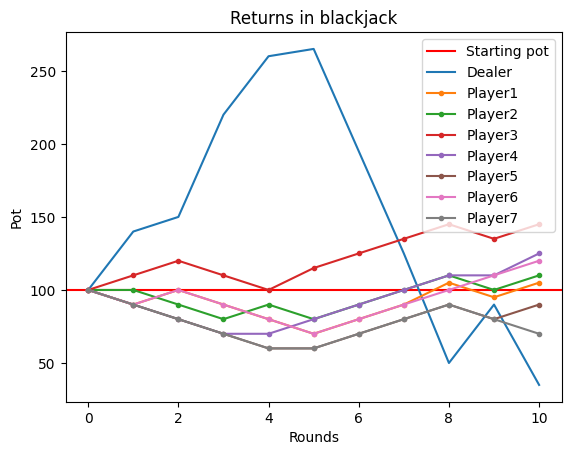

In [6]:
# plot dealer pot and history of players across first 10 rounds
plt.axhline(100, color='r', label='Starting pot')
plt.plot(range(11), pot_h['dealer'][0:11], label='Dealer')
for i in range(1, n+1): # iterate through players
    plt.plot(range(11), pot_h['player' + str(i)][0:11], marker = '.', label='Player' + str(i))
plt.xlabel('Rounds')
plt.ylabel('Pot')
plt.legend()
plt.title('Returns in blackjack')
plt.show()

## Conclusion:
In the long run, the dealer almost always makes money. The opposite is true for players, the player always loses in the long run. However, most players dont play 100's of rounds, they often limit to 10 rounds. 

## Short-runs - 10000 simulations

In this section, many simulations are performed for a varierty of risk strategies over a fixed number of rounds (say 10). The distribution of different returns are analyzed. 

In [7]:
# long run simulations
def MC_blackjack(simulations, rounds, m, n, risk, verbose):

    # hold each simulation pot in a seperate dictionary
    pot_sim = {}
    pot_sim['dealer'] = [100]
    for i in range(1, n+1): # across number of players after the dealer
        pot_sim['player' + str(i)] = [100]
    
    # hold net positive outcomes in a seperate dictionary
    # wins is defined as anything above the inital pot 
    wins = {}
    wins['dealer'] = 0
    for i in range(1, n+1): # across number of players after the dealer
        wins['player' + str(i)] = 0

    print('-'*40)
    print('Blackjack')
    print('Number of players: %d Number of decks: %d' % (n, m))
    print('Initial pot: Dealer: $%d Players: $%d' % (pot_sim['dealer'][-1], pot_sim['player1'][-1]))
    print('Risk profile: %s Simulations: %d' % (risk, simulations))
    print('-'*40)
    
    for i in range(simulations): # large number of simulations
        # print('Simulation %d' % (i))
        pot_h = blackjack(rounds, m, n, risk, verbose)
        # push the results to pot_sim at the end of rounds
        pot_sim['dealer'].append(pot_h['dealer'][-1])
        if pot_h['dealer'][-1] > 100: 
            wins['dealer'] += 1
        for i in range(1, n+1): # across number of players after the dealer
            pot_sim['player' + str(i)].append(pot_h['player' + str(i)][-1])
            if pot_h['player' + str(i)][-1] > 100: 
                wins['player' + str(i)] += 1
    
    print('-'*40)
    print('Summary of results')
    print('-'*40)
    
    print('Dealer: P0: %d P25: %d P50: %d P75: %d P100: %d --> Wins: %0.2f%%' 
          % (np.min(pot_sim['dealer']), np.percentile(pot_sim['dealer'], 25), np.median(pot_sim['dealer']), 
                    np.percentile(pot_sim['dealer'], 75), np.max(pot_sim['dealer']), 100*wins['dealer']/simulations))
    print('Players: P0: %d P25: %d P50: %d P75: %d P100: %d -- > Wins: %0.2f%%' 
          % (np.min(pot_sim['player1']), np.percentile(pot_sim['player1'], 25), np.median(pot_sim['player1']), 
                    np.percentile(pot_sim['player1'], 75), np.max(pot_sim['player1']), 
             100*wins['player1']/simulations))

    return None


## Testing effect of risk level of players on returns

In [8]:
simulations = 10000 # perform large number of simulations
rounds = 30 # number of rounds
m = 4 # decks of cards
n = 7 # number of players
risk = 'risky' # options are 'regular', 'risky' and 'conservative'
verbose = 'nil'

MC_blackjack(simulations, rounds, m, n, risk='risky', verbose='nil')
MC_blackjack(simulations, rounds, m, n, risk='regular', verbose='nil')
MC_blackjack(simulations, rounds, m, n, risk='conservative', verbose='nil')


----------------------------------------
Blackjack
Number of players: 7 Number of decks: 4
Initial pot: Dealer: $100 Players: $100
Risk profile: risky Simulations: 10000
----------------------------------------
----------------------------------------
Summary of results
----------------------------------------
Dealer: P0: -535 P25: 315 P50: 480 P75: 645 P100: 1325 --> Wins: 93.20%
Players: P0: -140 P25: 10 P50: 45 P75: 80 P100: 270 -- > Wins: 14.52%
----------------------------------------
Blackjack
Number of players: 7 Number of decks: 4
Initial pot: Dealer: $100 Players: $100
Risk profile: regular Simulations: 10000
----------------------------------------
----------------------------------------
Summary of results
----------------------------------------
Dealer: P0: -585 P25: 185 P50: 370 P75: 550 P100: 1310 --> Wins: 83.66%
Players: P0: -135 P25: 25 P50: 60 P75: 100 P100: 265 -- > Wins: 22.44%
----------------------------------------
Blackjack
Number of players: 7 Number of decks: 

### Conclusion: 

Conservative risk play has more chances of winning (net positive gains) over risky play. For the same number of players and decks of cards, it can be seen that the conservative player has 25% chance of winning compared to the risky player (14.5%). 

## Testing effect of number of rounds for the same decks of cards, players and risk level

In [9]:
# scenario - Effect of different number of rounds
simulations = 10000 # perform large number of simulations
rounds = 5 # number of rounds
m = 4 # decks of cards
n = 7 # number of players
risk = 'conservative' # options are 'regular', 'risky' and 'conservative'
verbose = 'nil'

MC_blackjack(simulations, 5, m, n, risk, verbose)
MC_blackjack(simulations, 10, m, n, risk, verbose)
MC_blackjack(simulations, 15, m, n, risk, verbose)
MC_blackjack(simulations, 30, m, n, risk, verbose)

----------------------------------------
Blackjack
Number of players: 7 Number of decks: 4
Initial pot: Dealer: $100 Players: $100
Risk profile: conservative Simulations: 10000
----------------------------------------
----------------------------------------
Summary of results
----------------------------------------
Dealer: P0: -255 P25: 60 P50: 140 P75: 225 P100: 450 --> Wins: 61.92%
Players: P0: 50 P25: 80 P50: 90 P75: 110 P100: 165 -- > Wins: 35.41%
----------------------------------------
Blackjack
Number of players: 7 Number of decks: 4
Initial pot: Dealer: $100 Players: $100
Risk profile: conservative Simulations: 10000
----------------------------------------
----------------------------------------
Summary of results
----------------------------------------
Dealer: P0: -445 P25: 70 P50: 185 P75: 295 P100: 720 --> Wins: 68.69%
Players: P0: 0 P25: 65 P50: 90 P75: 110 P100: 205 -- > Wins: 31.58%
----------------------------------------
Blackjack
Number of players: 7 Number of dec

### Conclusion:

Increasing the number of rounds in each play decreases the chances of winning. It is evident from the above example that the player's chance of winning drops from 32.39% (5 rounds) to 25.70% (30 rounds). 